In [17]:
%matplotlib inline
import h5pyd
import numpy as np

In [18]:
# get handle to domain object
f = h5pyd.File("Land_and_Ocean_LatLong1.test.hdfgroup.org", "r", endpoint="http://127.0.0.1:5000")
# this is the root group uuid
f.id.uuid

u'39400ce6-263e-11e5-bd87-3c15c2da029e'

In [19]:
print f.keys()
temp = f['/temperature']
print temp.shape
one_slice = temp[16,:,:]
print one_slice.shape
one_slice = np.squeeze(one_slice) # convert to 2d
print one_slice.shape

[u'longitude', u'latitude', u'land_mask', u'temperature', u'month_number', u'climatology', u'time']
[1980, 180, 360]
(1, 180, 360)
(180, 360)


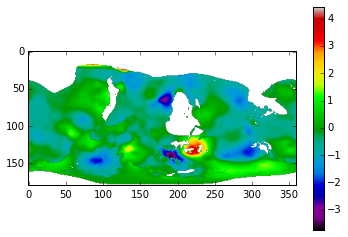

In [20]:
#plot the data
import matplotlib.pyplot as plt
plt.imshow(one_slice)
plt.set_cmap('spectral')
plt.colorbar()
plt.show()

In [21]:
g = h5pyd.File("nanex.test.hdfgroup.org", "r", endpoint="http://127.0.0.1:5000")
dset = g['/Nanex/OKey']
print "shape:", dset.shape
print "type:", dset.dtype

shape: [525000]
type: [('Key', '<u4'), ('RootSymbol', 'S16'), ('Strike', '<f4'), ('Month', 'u1'), ('Day', 'u1'), ('Year', '<i2'), ('PutCall', 'u1'), ('UnderSym', 'S16'), ('UnderType', 'S1'), ('UnderKey', '<u4'), ('NumTrades', '<u4')]


In [22]:
aapl = dset.read_where('RootSymbol == "AAPL"') #get all rows where the symbol is AAPL

In [23]:
aapl.shape

(2982,)

In [24]:
aapl[0:5]  # first 5 rows

array([(100001L, 'AAPL', 505.0, 1, 4, 2013, 0, 'AAPL', 'e', 10L, 0L),
       (100002L, 'AAPL', 545.0, 1, 4, 2013, 1, 'AAPL', 'e', 10L, 0L),
       (100003L, 'AAPL', 500.0, 1, 4, 2013, 0, 'AAPL', 'e', 10L, 0L),
       (100004L, 'AAPL', 490.0, 1, 4, 2013, 0, 'AAPL', 'e', 10L, 0L),
       (100005L, 'AAPL', 480.0, 1, 19, 2013, 0, 'AAPL', 'e', 10L, 0L)], 
      dtype=[('Key', '<u4'), ('RootSymbol', 'S16'), ('Strike', '<f4'), ('Month', 'u1'), ('Day', 'u1'), ('Year', '<i2'), ('PutCall', 'u1'), ('UnderSym', 'S16'), ('UnderType', 'S1'), ('UnderKey', '<u4'), ('NumTrades', '<u4')])